In [1]:
from impfuncs import *

states=np.array(["India",'Maharastra', "Delhi",
     'Gujarat','Rajasthan',"West Bengal",'Madhya Pradesh'])

clrs=['#008000','#C0C0C0', '#FFC0CB', '#FF0000', '#D2691E',
     '#aafbff', '#0000FF', '#9400D3','#306998','#f4c430','#00563f',"#FFFF00","#ACDDDE","#FF4500","#FFFA8D"]



from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)
colorcycler=cycle(clrs)


/private/var/mobile/Containers/Shared/AppGroup/8D8E6A4E-6B31-4B79-BEF3-5994929C193E/File Provider Storage/Repositories/covid_India/impfuncs.py:94: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_cases=df2_cases[df["Date"]>=start_date]
/private/var/mobile/Containers/Shared/AppGroup/8D8E6A4E-6B31-4B79-BEF3-5994929C193E/File Provider Storage/Repositories/covid_India/impfuncs.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_recovered=df2_recovered[df["Date"]>=start_date]
/private/var/mobile/Containers/Shared/AppGroup/8D8E6A4E-6B31-4B79-BEF3-5994929C193E/File Provider Storage/Repositories/covid_India/impfuncs.py:96: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_dead=df2_dead[df["Date"]>=start_date]


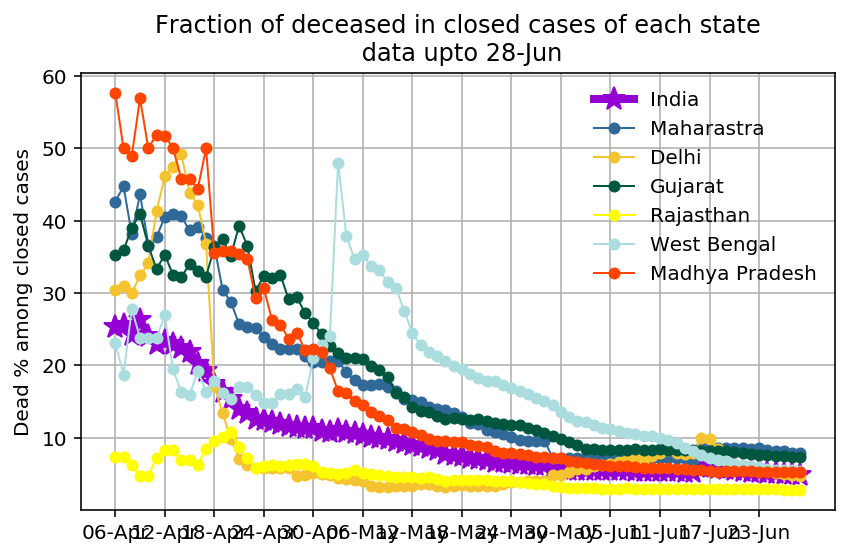

In [3]:
start_day=23
end_day=107
dfs=populate_dfs()    
dts=getDates(start_day,end_day)


for state in states:
    
    arr=load_Data(dfs=dfs,start_day=start_day,day_max=end_day,state=state)
    closed=column(arr,2)-column(arr,5)
    dead_percent_closed=(column(arr,4)/closed)*100
    if state=="India":
        plt.plot(column(arr,0),dead_percent_closed,markersize=12,marker="*",linewidth=4,color=next(colorcycler),label=state)
    else:
        plt.plot(column(arr,0),dead_percent_closed,markersize=5,marker="o",linewidth=1,color=next(colorcycler),label=state)
    
plt.xticks(range(0,end_day-start_day,6),dts[range(0,end_day-start_day,6)])

plt.xticks()
plt.ylabel("Dead % among closed cases")
plt.grid(True)
plt.legend(frameon=False)
plt.title("Fraction of deceased in closed cases of each state\n data upto "+dts[end_day-start_day-1])
plt.tight_layout()
plt.savefig("closed_ratio.png")
plt.show()